<a href="https://colab.research.google.com/github/hwanin99/NLP_Study/blob/main/8_%EC%88%9C%ED%99%98%20%EC%8B%A0%EA%B2%BD%EB%A7%9D(Recurrent%20Neural%20Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터** 

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 단방향 구조

  - 이전 스텝의 출력의 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - 현재 상태가 이전 상태에 종속

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시각을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN

- one to many
  - Image Captioning 

  - 이미지에 대한 설명 생성

- many to one
  - Sentiment Classification

  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many
  - Machine Translation

  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)




## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

- $h$는 '상태'를 기억

- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [ ]:
import numpy as np

In [ ]:
timesteps=100
input_features=32
output_features=64

inputs=np.random.random((timesteps,input_features))

state_t=np.zeros((output_features, ))

W=np.random.random((output_features,input_features))
U=np.random.random((output_features,output_features))
b=np.random.random((output_features, ))

successive_outputs=[]

for input_t in inputs:
  output_t=np.tanh(np.dot(W,input_t)+np.dot(U,state_t)+b)
  successive_outputs.append(output_t)
  state_t=output_t

final_ouput_sequence=np.stack(successive_outputs,axis=0)

## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [ ]:
from tensorflow.keras.layers import SimpleRNN,Embedding
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(16))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 16)                784       
                                                                 
Total params: 322,864
Trainable params: 322,864
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [ ]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## IMDB 데이터 적용

### 데이터 로드

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [ ]:
num_words=10000
max_len=500
batch_size=32

(input_train,y_train),(input_test,y_test)=imdb.load_data(num_words=num_words)
print(len(input_train))
print(len(input_test))

input_train=sequence.pad_sequences(input_train,maxlen=max_len)
input_test=sequence.pad_sequences(input_test,maxlen=max_len)
print(input_train.shape)
print(input_test.shape)

17464789/17464789 [==============================] - 2s 0us/step
25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

model.add(Embedding(num_words,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history=model.fit(input_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 70s 428ms/step - loss: 0.6214 - acc: 0.6322 - val_loss: 0.4454 - val_acc: 0.8110
Epoch 2/10
157/157 [==============================] - 68s 432ms/step - loss: 0.3928 - acc: 0.8366 - val_loss: 0.3578 - val_acc: 0.8536
Epoch 3/10
157/157 [==============================] - 66s 422ms/step - loss: 0.3084 - acc: 0.8753 - val_loss: 0.3546 - val_acc: 0.8522
Epoch 4/10
157/157 [==============================] - 67s 424ms/step - loss: 0.2552 - acc: 0.9017 - val_loss: 0.3728 - val_acc: 0.8580
Epoch 5/10
157/157 [==============================] - 67s 424ms/step - loss: 0.2019 - acc: 0.9258 - val_loss: 0.4094 - val_acc: 0.8220
Epoch 6/10
157/157 [==============================] - 68s 433ms/step - loss: 0.1628 - acc: 0.9427 - val_loss: 0.3988 - val_acc: 0.8616
Epoch 7/10
157/157 [==============================] - 66s 421ms/step - loss: 0.1220 - acc: 0.9584 - val_loss: 0.4397 - val_acc: 0.8470
Epoch 8/10
157/157 [==============================] - 6

### 시각화

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

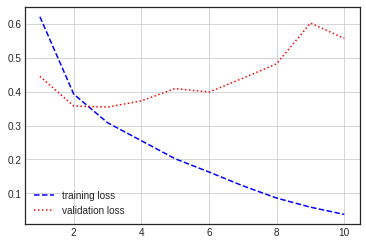

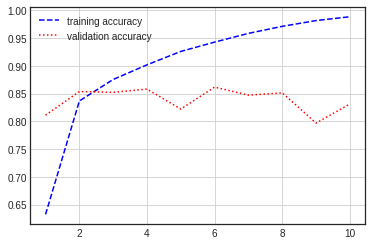

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['acc']
val_acc=history.history['val_acc']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'b--',label='training loss')
plt.plot(epochs,val_loss,'r:',label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs,acc,'b--',label='training accuracy')
plt.plot(epochs,val_acc,'r:',label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

In [ ]:
model.evaluate(input_test,y_test)

782/782 [==============================] - 29s 37ms/step - loss: 0.5696 - acc: 0.8295


[0.5696319341659546, 0.829479992389679]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



# LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## IMDB 데이터

### 데이터 로드

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
num_words=10000
max_len=500

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=num_words)
print(len(x_train))
print(len(x_test))

pad_x_train=sequence.pad_sequences(x_train,maxlen=max_len)
pad_x_test=sequence.pad_sequences(x_test,maxlen=max_len)
print(pad_x_train.shape)
print(pad_x_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,GRU,Embedding

In [ ]:
model=Sequential()

model.add(Embedding(num_words,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history=model.fit(pad_x_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 8s 24ms/step - loss: 0.5022 - acc: 0.7566 - val_loss: 0.3680 - val_acc: 0.8462
Epoch 2/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2866 - acc: 0.8857 - val_loss: 0.4757 - val_acc: 0.8100
Epoch 3/10
157/157 [==============================] - 3s 21ms/step - loss: 0.2315 - acc: 0.9124 - val_loss: 0.3122 - val_acc: 0.8720
Epoch 4/10
157/157 [==============================] - 3s 21ms/step - loss: 0.1970 - acc: 0.9259 - val_loss: 0.3240 - val_acc: 0.8778
Epoch 5/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1764 - acc: 0.9354 - val_loss: 0.4287 - val_acc: 0.8406
Epoch 6/10
157/157 [==============================] - 3s 21ms/step - loss: 0.1599 - acc: 0.9436 - val_loss: 0.3177 - val_acc: 0.8832
Epoch 7/10
157/157 [==============================] - 3s 21ms/step - loss: 0.1460 - acc: 0.9485 - val_loss: 0.3872 - val_acc: 0.8782
Epoch 8/10
157/157 [==============================] - 3s 21ms/step - 

### 시각화

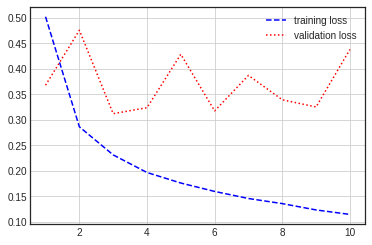

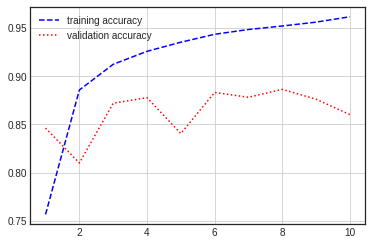

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['acc']
val_acc=history.history['val_acc']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'b--',label='training loss')
plt.plot(epochs,val_loss,'r:',label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs,acc,'b--',label='training accuracy')
plt.plot(epochs,val_acc,'r:',label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [ ]:
model.evaluate(pad_x_test,y_test)

782/782 [==============================] - 7s 9ms/step - loss: 0.4717 - acc: 0.8482


[0.4716738760471344, 0.8481600284576416]

# GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\ 
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


## Reuters 데이터

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋 
  - 다중 분류 문제


### 데이터셋 로드

In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
num_words=10000
(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=num_words)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

2110848/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
(2246,)
(2246,)


### 데이터 전처리 및 확인

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len=300

In [ ]:
pad_x_train=pad_sequences(x_train,maxlen=max_len)
pad_x_test=pad_sequences(x_test,maxlen=max_len)

print(len(pad_x_train[0]))

300


In [ ]:
pad_x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU,Dense,Embedding

In [ ]:
model=Sequential()
model.add(Embedding(input_dim=num_words,output_dim=256))
model.add(GRU(256,return_sequences=True))
model.add(GRU(128))
model.add(Dense(46,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 256)         2560000   
                                                                 
 gru (GRU)                   (None, None, 256)         394752    
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense_2 (Dense)             (None, 46)                5934      
                                                                 
Total params: 3,108,910
Trainable params: 3,108,910
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history=model.fit(pad_x_train,y_train,
                  batch_size=32,epochs=20,
                  validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 11s 37ms/step - loss: 1.9764 - acc: 0.4907 - val_loss: 1.6620 - val_acc: 0.5598
Epoch 2/20
225/225 [==============================] - 8s 34ms/step - loss: 1.4858 - acc: 0.6221 - val_loss: 1.4802 - val_acc: 0.6383
Epoch 3/20
225/225 [==============================] - 8s 35ms/step - loss: 1.1782 - acc: 0.6984 - val_loss: 1.3811 - val_acc: 0.6639
Epoch 4/20
225/225 [==============================] - 8s 34ms/step - loss: 0.9296 - acc: 0.7573 - val_loss: 1.3127 - val_acc: 0.6889
Epoch 5/20
225/225 [==============================] - 8s 37ms/step - loss: 0.7026 - acc: 0.8178 - val_loss: 1.3517 - val_acc: 0.6962
Epoch 6/20
225/225 [==============================] - 8s 33ms/step - loss: 0.5340 - acc: 0.8629 - val_loss: 1.4369 - val_acc: 0.6973
Epoch 7/20
225/225 [==============================] - 8s 34ms/step - loss: 0.4066 - acc: 0.8966 - val_loss: 1.4085 - val_acc: 0.7123
Epoch 8/20
225/225 [==============================] - 7s 33ms/step -

### 시각화

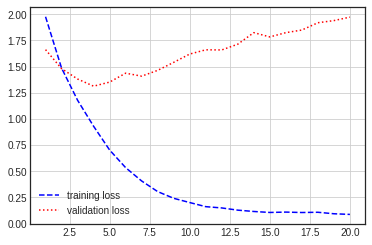

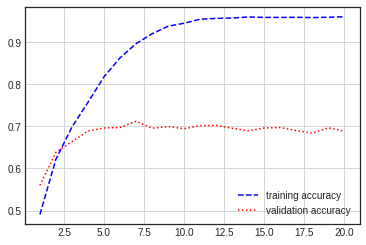

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['acc']
val_acc=history.history['val_acc']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'b--',label='training loss')
plt.plot(epochs,val_loss,'r:',label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs,acc,'b--',label='training accuracy')
plt.plot(epochs,val_acc,'r:',label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

### 모델 평가


In [ ]:
model.evaluate(pad_x_test,y_test)

71/71 [==============================] - 1s 14ms/step - loss: 2.0692 - acc: 0.6759


[2.069232940673828, 0.6758682131767273]